In [54]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.tree import export_graphviz 
import graphviz
from sklearn.metrics import precision_score, recall_score

In [55]:
data = pd.read_csv('BestCard_Data.csv')

In [56]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


In [57]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,none,others,university
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,...,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,167919.054905,1.603060,1.842334,1.556031,35.505213,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,...,5259.514964,4887.048717,4843.729973,5257.843047,0.221797,0.352985,0.164266,0.011214,0.004313,0.467222
std,129839.453081,0.489272,0.744661,0.521463,9.227442,1.126769,1.198640,1.199165,1.167897,1.131735,...,17265.439561,15956.349371,15311.721795,17635.468185,0.415463,0.477907,0.370524,0.105301,0.065532,0.498934
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,390.000000,294.750000,242.750000,111.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1822.000000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4556.250000,4050.500000,4082.750000,4015.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,800000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,889043.000000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
data.shape

(26664, 31)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [60]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
EDUCATION_CAT                 0
graduate school               0
high school                   0
none                          0
others                        0
university                    0
dtype: i

In [61]:
data['default payment next month'].value_counts()

0    20750
1     5914
Name: default payment next month, dtype: int64

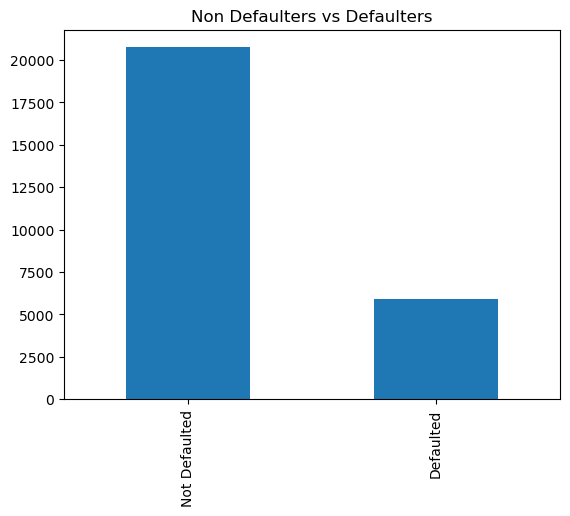

In [62]:
data['default payment next month'].value_counts().plot.bar()
plt.title('Non Defaulters vs Defaulters')
plt.xticks([0,1], labels=["Not Defaulted", "Defaulted"])
plt.show()

In [63]:
columns_to_drop = ['ID', 'EDUCATION_CAT', 'graduate school', 'high school', 'none', 'others', 'university']
data = data.drop(columns=columns_to_drop)

In [64]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [65]:
X = data.drop('default payment next month', axis = 1)
y = data['default payment next month']

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0, stratify = y)

# RANDOM FOREST

In [67]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [68]:
y_rf_pred = forest.predict(X_test)
accuracy_original = accuracy_score(y_test, y_rf_pred)
print("Accuracy on test set: ", accuracy_original)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))

Accuracy on test set:  0.8111756984811551
Accuracy on training set: 0.999


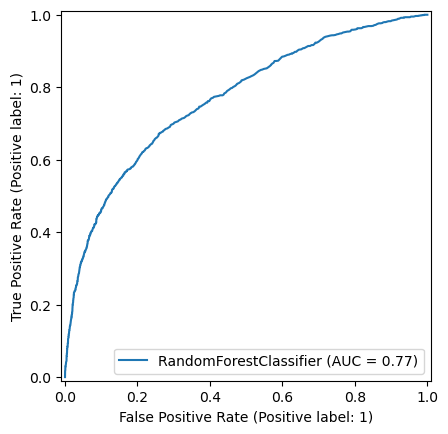

In [69]:
RocCurveDisplay.from_estimator(forest, X_test, y_test)

In [70]:
cm_forest = confusion_matrix(y_test, y_rf_pred)
print(cm_forest)

[[3907  243]
 [ 764  419]]


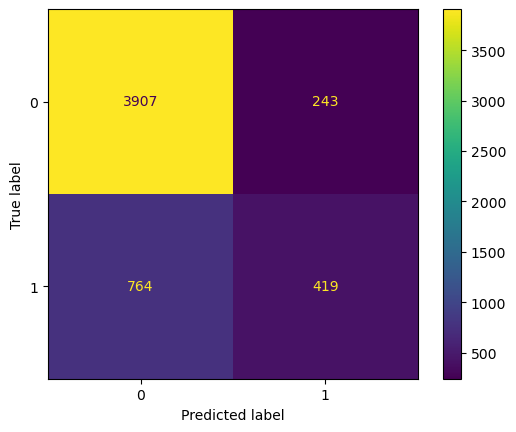

In [71]:
ConfusionMatrixDisplay.from_estimator(forest,X_test,y_test)

In [72]:

f1_forest = f1_score(y_test, y_rf_pred)
print("F1 Score:", f1_forest)
precision_forest = precision_score(y_test, y_rf_pred)
recall_forest = recall_score(y_test, y_rf_pred)

print(f'Precision: {precision_forest}')
print(f'Recall: {recall_forest}')

F1 Score: 0.45420054200542004
Precision: 0.6329305135951662
Recall: 0.35418427726120033


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_rf_pred,target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4150
           1       0.63      0.35      0.45      1183

    accuracy                           0.81      5333
   macro avg       0.73      0.65      0.67      5333
weighted avg       0.79      0.81      0.79      5333



In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 4: Grid Search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [91]:
y_pred_grid = grid_search.predict(X_test)
accuracy_ggrid = accuracy_score(y_test, y_pred_grid)
print(accuracy_ggrid)

0.8154884680292518


In [89]:
# Step 6: Select Best Hyperparameters
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
print("Best parameters:", best_params)
print("Best estimators:", best_rf)

# Step 7: Evaluate on Test Set
test_accuracy = best_rf.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
train_accuracy = best_rf.score(X_train, y_train)
print(train_accuracy)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best estimators: RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)
Test Accuracy: 0.8154884680292518
0.8561248886596972


In [92]:
f1_forest_grid = f1_score(y_test, y_pred_grid)
print("F1 Score:", f1_forest_grid)
precision_forest_grid = precision_score(y_test, y_pred_grid)
recall_forest_grid = recall_score(y_test, y_pred_grid)

print(f'Precision: {precision_forest_grid}')
print(f'Recall: {recall_forest_grid}')

F1 Score: 0.45027932960893857
Precision: 0.6639209225700164
Recall: 0.34065934065934067


# RANDOM FOREST - SMOTE

In [74]:
import sklearn.utils._param_validation
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

In [75]:
forest1 = RandomForestClassifier(n_estimators=1000, random_state=0)
forest1.fit(X_train1, y_train1)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [76]:
y_rf_pred1 = forest1.predict(X_test1)
accuracy_smote = accuracy_score(y_test1, y_rf_pred1)
print("Accuracy on test set: ", accuracy_smote)
print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test1, y_rf_pred1)))
print("Accuracy on training set: {:.3f}".format(forest1.score(X_train1, y_train1)))


Accuracy on test set:  0.8508433734939759
Random Forest Accuracy on test set: 0.851
Accuracy on training set: 0.999


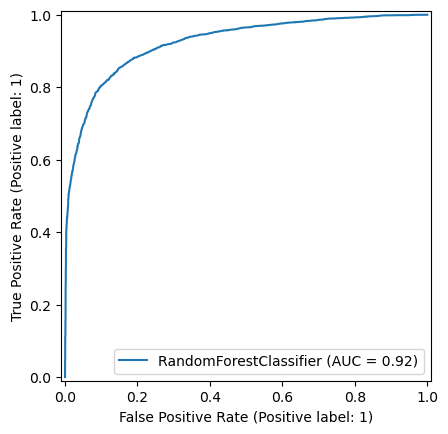

In [77]:
RocCurveDisplay.from_estimator(forest1, X_test1, y_test1)

In [78]:
from sklearn.metrics import precision_score, recall_score
f1_smote = f1_score(y_test1, y_rf_pred1)
print("F1 Score:", f1_smote)
precision_smote = precision_score(y_test1, y_rf_pred1)
recall_smote = recall_score(y_test1, y_rf_pred1)

print(f'Precision: {precision_smote}')
print(f'Recall: {recall_smote}')

F1 Score: 0.8493184031158715
Precision: 0.861907114624506
Recall: 0.8370921305182342


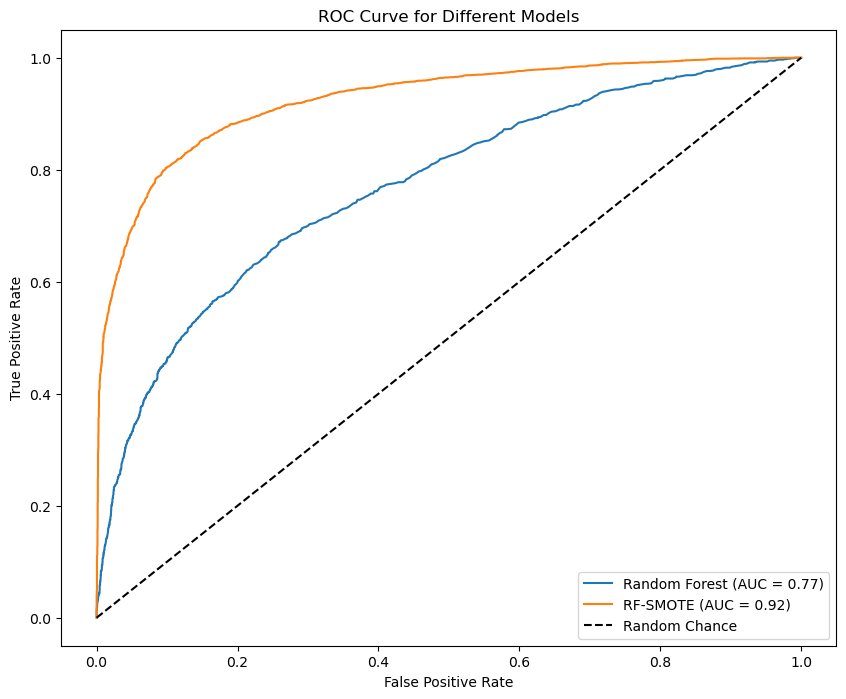

In [79]:
from sklearn.metrics import roc_curve, auc
# Instantiate models
models = {
    'Random Forest': forest,
    'RF-SMOTE': forest1
}

# Plot ROC curve for each model
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    if model_name == 'Random Forest':
        model.fit(X_train, y_train)
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    elif model_name == 'RF-SMOTE':
        model.fit(X_train1, y_train1)
        y_prob = model.predict_proba(X_test1)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test1, y_prob)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.show()

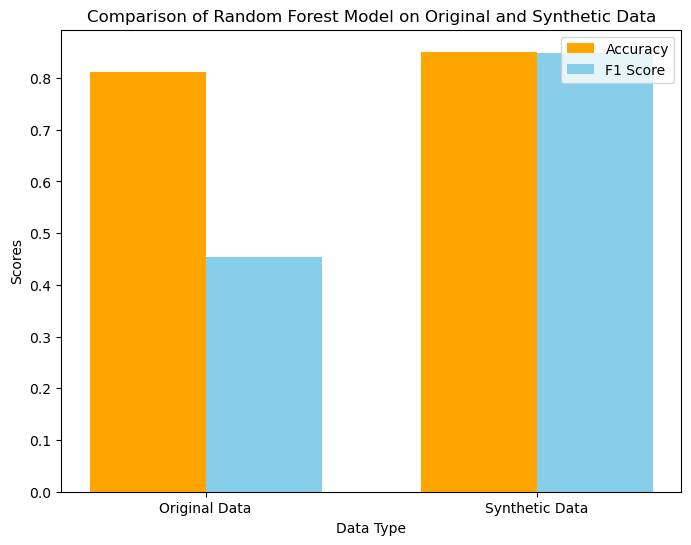

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the accuracy and F1 scores calculated from the previous code snippet
accuracy_scores = [accuracy_original, accuracy_smote]
f1_scores = [f1_forest, f1_smote]

labels = ['Original Data', 'Synthetic Data']

# Plot the comparison using a bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(labels))

bar1 = ax.bar(index, accuracy_scores, bar_width, label='Accuracy', color='orange')
bar2 = ax.bar(index + bar_width, f1_scores, bar_width, label='F1 Score', color='skyblue')

ax.set_xlabel('Data Type')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Random Forest Model on Original and Synthetic Data')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()



In [81]:
''''
import pickle
pickle_out = open("randomForest.pkl", "wb")
pickle.dump(forest, pickle_out)
pickle_out.close()
'''

'\'\nimport pickle\npickle_out = open("randomForest.pkl", "wb")\npickle.dump(forest, pickle_out)\npickle_out.close()\n'

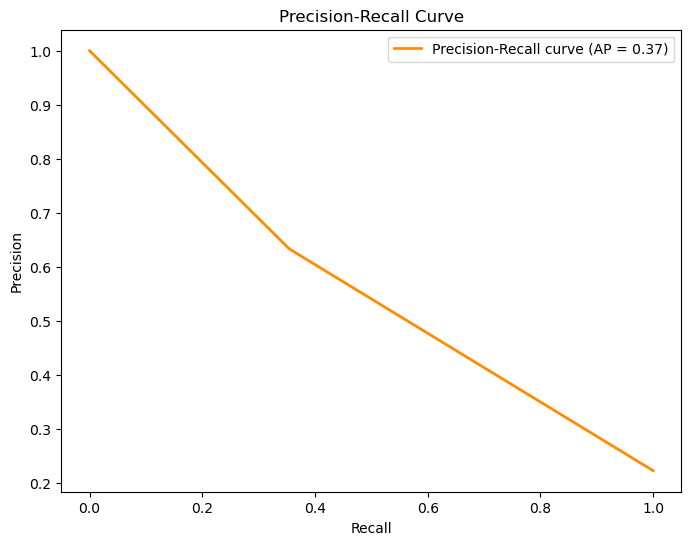

In [82]:
#Original model
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have y_true and y_pred_proba from your model
# y_true = true labels, y_pred_proba = predicted probabilities for positive class

# Generate example data (replace with your actual data)
np.random.seed(42)

# Compute Precision-Recall curve and area under the curve
precision, recall, _ = precision_recall_curve(y_test, y_rf_pred)
average_precision = average_precision_score(y_test, y_rf_pred)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [94]:
rf_smote_grid = RandomForestClassifier(random_state=42)
grid_search_smote = GridSearchCV(rf_smote_grid, param_grid, cv=5, scoring='accuracy')
grid_search_smote.fit(X_train1, y_train1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [96]:
y_pred_grid2 = grid_search_smote.predict(X_test1)
accuracy_ggrid2 = accuracy_score(y_test1, y_pred_grid2)
print(accuracy_ggrid2)

0.8527710843373494


In [95]:
# Step 6: Select Best Hyperparameters
best_params1 = grid_search_smote.best_params_
best_rf1 = grid_search_smote.best_estimator_
print("Best parameters:", best_params1)
print("Best estimators:", best_rf1)

# Step 7: Evaluate on Test Set
test_accuracy1 = best_rf1.score(X_test1, y_test1)
print("Test Accuracy:", test_accuracy1)
train_accuracy1 = best_rf1.score(X_train1, y_train1)
print(train_accuracy1)

Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best estimators: RandomForestClassifier(max_depth=30, n_estimators=200, random_state=42)
Test Accuracy: 0.8527710843373494
0.9991566265060241


In [99]:
f1_forest_grid2 = f1_score(y_test1, y_pred_grid2)
print("F1 Score:", f1_forest_grid2)
precision_forest_grid = precision_score(y_test1, y_pred_grid2)
recall_forest_grid = recall_score(y_test1, y_pred_grid2)

print(f'Precision: {precision_forest_grid}')
print(f'Recall: {recall_forest_grid}')

F1 Score: 0.8515909642943891
Precision: 0.8622725036891293
Recall: 0.8411708253358925
